In [1]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from collections import Counter
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
news=pd.read_csv('fake_or_real_news.csv')
news.shape


(6335, 4)

In [3]:
Counter(news['label'])   

Counter({'REAL': 3171, 'FAKE': 3164})

In [4]:
x_train,x_test,y_train,y_test=train_test_split(news['text'],news['label'],test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5068,)
(1267,)
(5068,)
(1267,)


In [5]:
tfidf=TfidfVectorizer(stop_words='english',max_df=0.8)
x_train=tfidf.fit_transform(x_train)
x_test=tfidf.transform(x_test)
print(x_test.shape)
print(x_train.shape)

(1267, 61967)
(5068, 61967)


In [6]:
model1=PassiveAggressiveClassifier(max_iter=300)
model1.fit(x_train,y_train)
model2=GaussianNB()
model2.fit(x_train.toarray(),y_train)
model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)
model4=RandomForestClassifier()
model4.fit(x_train,y_train)
model5=SVC()
model5.fit(x_train,y_train)
model6=LogisticRegression()
model6.fit(x_train,y_train)

LogisticRegression()

In [7]:
y_pred1=model1.predict(x_test)
y_pred2=model2.predict(x_test.toarray())
y_pred3=model3.predict(x_test)
y_pred4=model4.predict(x_test)
y_pred5=model5.predict(x_test)
y_pred6=model6.predict(x_test)

In [8]:
acc1=accuracy_score(y_test,y_pred1)
acc2=accuracy_score(y_test,y_pred2)
acc3=accuracy_score(y_test,y_pred3)
acc4=accuracy_score(y_test,y_pred4)
acc5=accuracy_score(y_test,y_pred5)
acc6=accuracy_score(y_test,y_pred6)

labels={'PassiveAggressiveClassifier':acc1,'GaussianNB':acc2,'DecisionTreeClassifier':acc3,'RandomForestClassifier':acc4,
        'SVC':acc5,'LogisticRegression':acc6}
for model,accuracy in labels.items():
    print(str(model)+' : '+str(accuracy))

PassiveAggressiveClassifier : 0.9384372533543804
GaussianNB : 0.8168902920284136
DecisionTreeClassifier : 0.8089976322020521
RandomForestClassifier : 0.9005524861878453
SVC : 0.9321231254932912
LogisticRegression : 0.9123914759273876


Text(0.5, 1.0, 'Fake news')

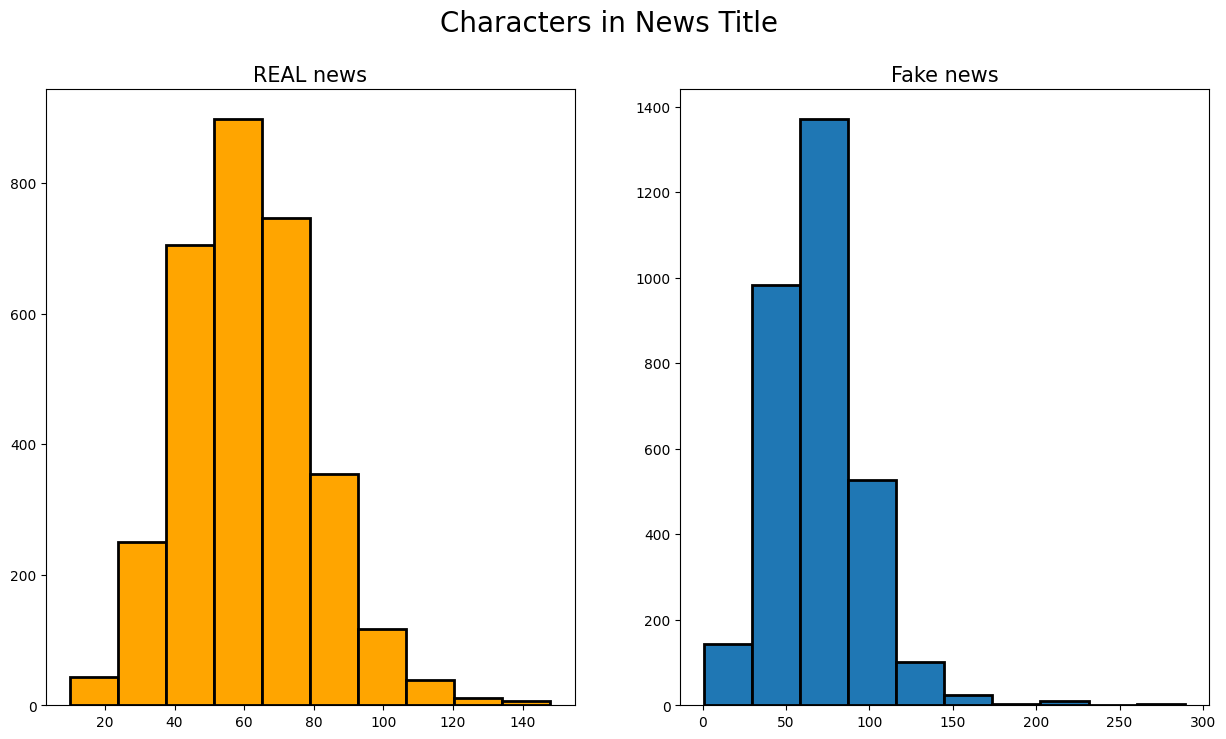

In [9]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Characters in News Title',fontsize=20)
news_len=news[news['label']=='REAL']['title'].str.len()
ax1.hist(news_len,color='orange',linewidth=2,edgecolor='black')
ax1.set_title('REAL news',fontsize=15)
news_len=news[news['label']=='FAKE']['title'].str.len()
ax2.hist(news_len,linewidth=2,edgecolor='black')
ax2.set_title('Fake news',fontsize=15)

Text(0.5, 1.0, 'Fake news')

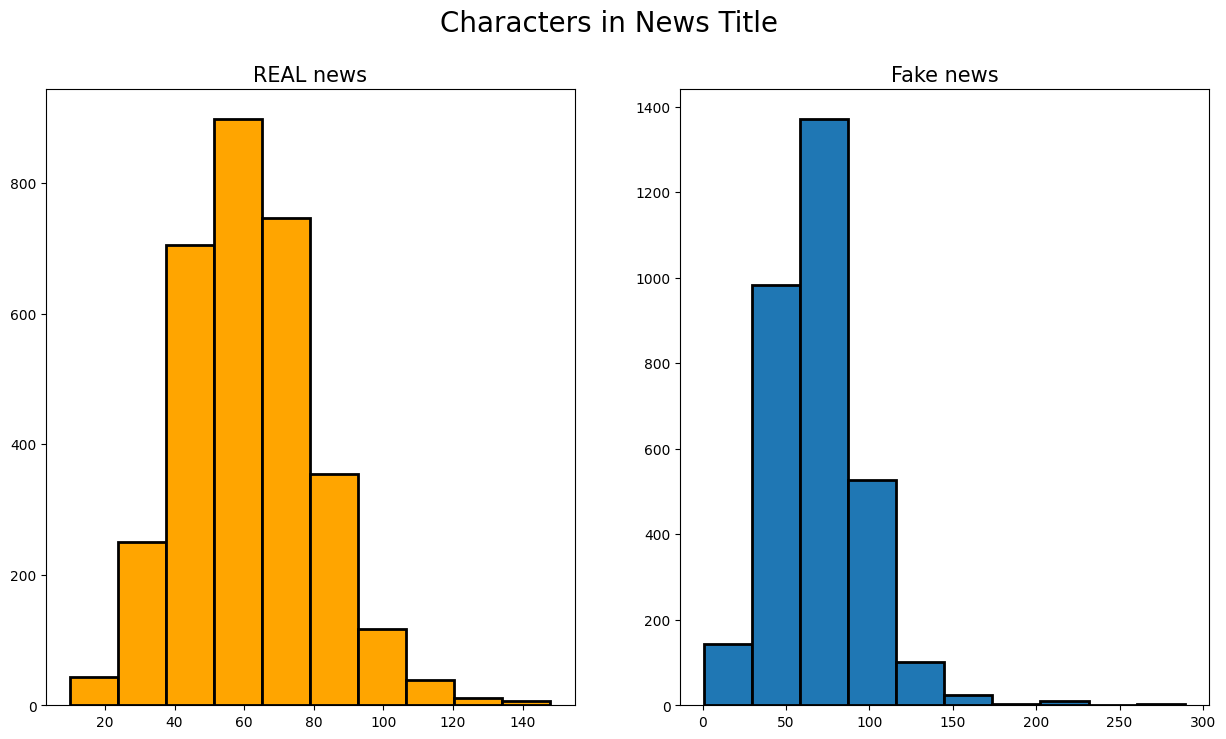

In [10]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Characters in News Title',fontsize=20)
news_len=news[news['label']=='REAL']['title'].str.len()
ax1.hist(news_len,color='orange',linewidth=2,edgecolor='black')
ax1.set_title('REAL news',fontsize=15)
news_len=news[news['label']=='FAKE']['title'].str.len()
ax2.hist(news_len,linewidth=2,edgecolor='black')
ax2.set_title('Fake news',fontsize=15)

<BarContainer object of 6 artists>

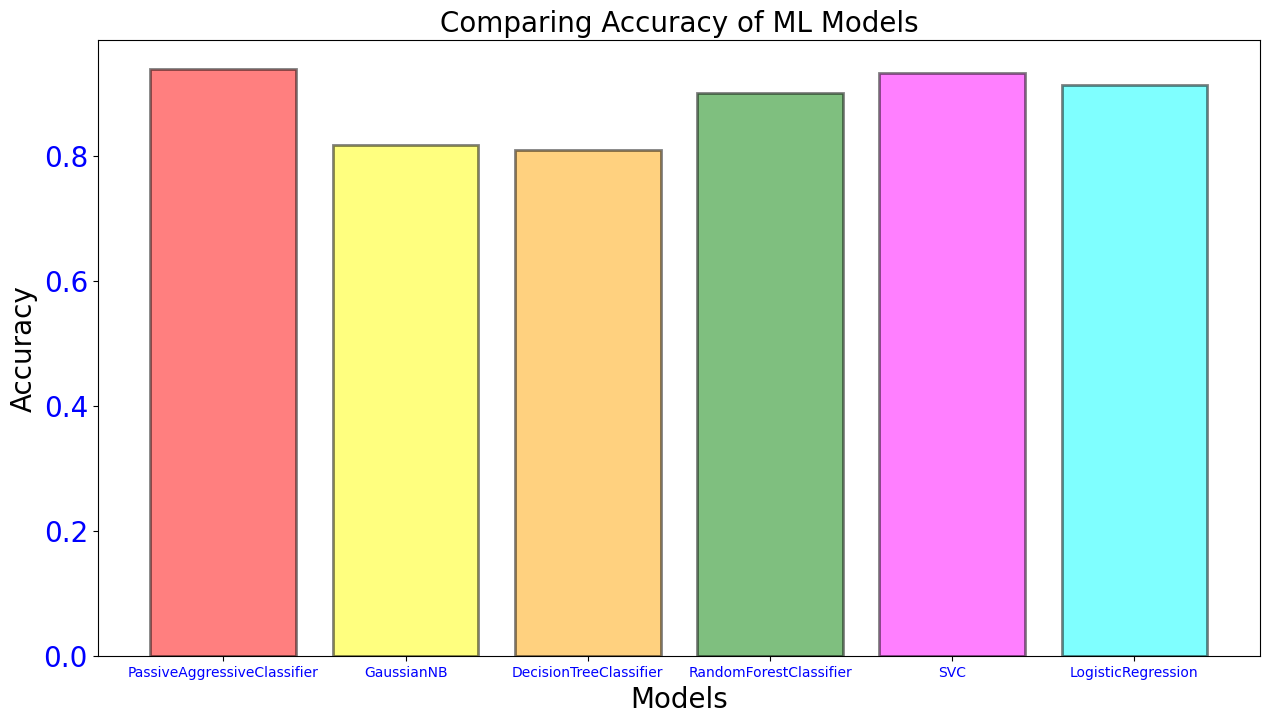

In [11]:
plt.figure(figsize=(15,8))
plt.title('Comparing Accuracy of ML Models',fontsize=20)
colors=['red','yellow','orange','green','magenta','cyan']
plt.xticks(fontsize=10,color='blue')
plt.yticks(fontsize=20,color='blue')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels.keys(),labels.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5)

In [12]:
cm1=confusion_matrix(y_test,y_pred1)
cm2=confusion_matrix(y_test,y_pred2)
cm3=confusion_matrix(y_test,y_pred3)
cm4=confusion_matrix(y_test,y_pred4)
cm5=confusion_matrix(y_test,y_pred5)
cm6=confusion_matrix(y_test,y_pred6)

In [13]:
print('Confusion Matrix for PassiveAggressiveClassifier')
cm1

Confusion Matrix for PassiveAggressiveClassifier


array([[583,  38],
       [ 40, 606]])

Confusion Matrix for PassiveAggressiveClassifier


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

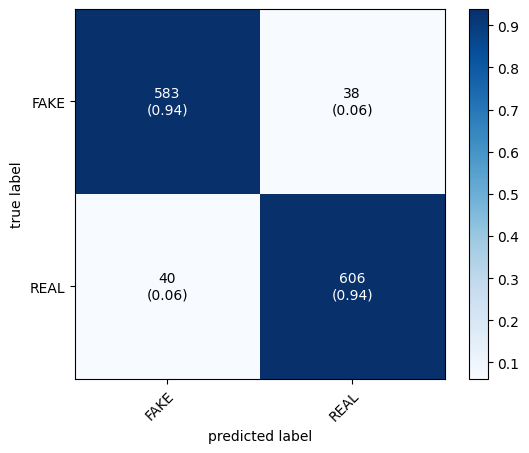

In [14]:
print('Confusion Matrix for PassiveAggressiveClassifier')
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

In [15]:
print('Confusion Matrix for GaussianNB')
cm2

Confusion Matrix for GaussianNB


array([[477, 144],
       [ 88, 558]])

Confusion Matrix for GaussianNB


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

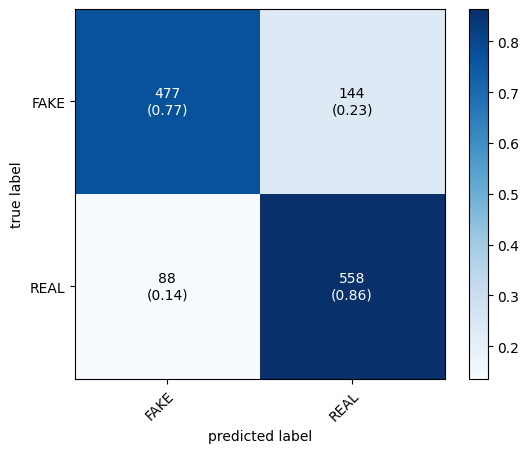

In [16]:
print('Confusion Matrix for GaussianNB')
plot_confusion_matrix(conf_mat=cm2,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

In [17]:
print('Confusion Matrix for DecisionTreeClassifier')
cm3

Confusion Matrix for DecisionTreeClassifier


array([[502, 119],
       [123, 523]])

Confusion Matrix for DecisionTreeClassifier


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

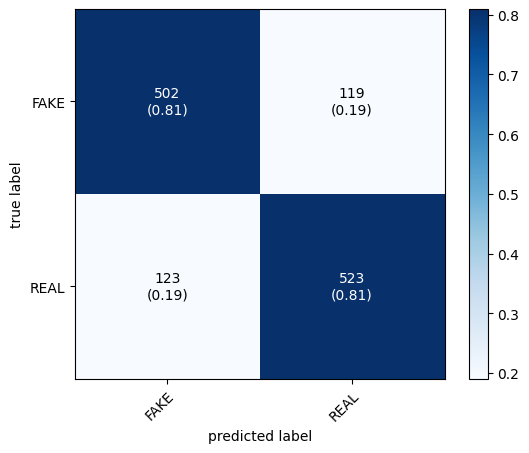

In [18]:
print('Confusion Matrix for DecisionTreeClassifier')
plot_confusion_matrix(conf_mat=cm3,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

In [19]:
print('Confusion Matrix for RandomForestClassifier')
cm4

Confusion Matrix for RandomForestClassifier


array([[556,  65],
       [ 61, 585]])

Confusion Matrix for RandomForestClassifier


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

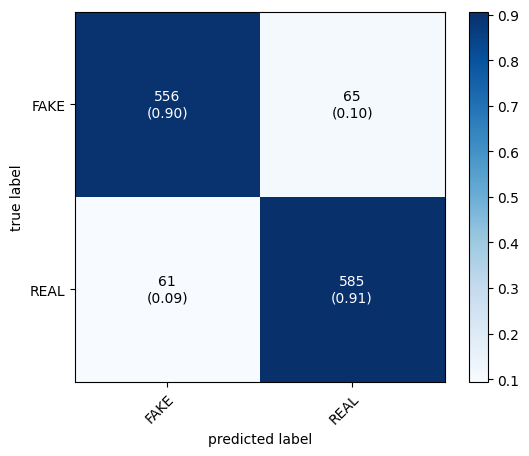

In [20]:
print('Confusion Matrix for RandomForestClassifier')
plot_confusion_matrix(conf_mat=cm4,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

In [21]:
print('Confusion Matrix for SVC')
cm5

Confusion Matrix for SVC


array([[594,  27],
       [ 59, 587]])

Confusion Matrix for SVC


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

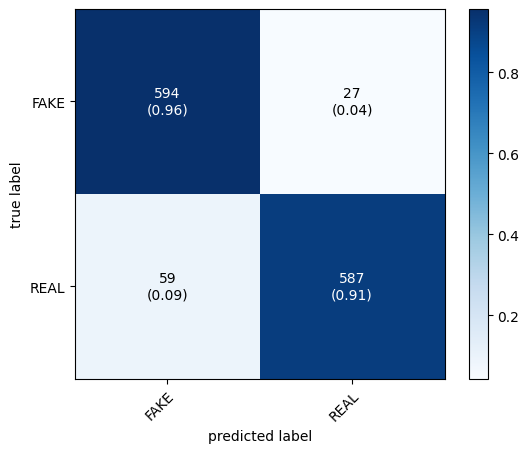

In [22]:
print('Confusion Matrix for SVC')
plot_confusion_matrix(conf_mat=cm5,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

In [23]:
print('Confusion Matrix for LogisticRegression')
cm6


Confusion Matrix for LogisticRegression


array([[584,  37],
       [ 74, 572]])

Confusion Matrix for LogisticRegression


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

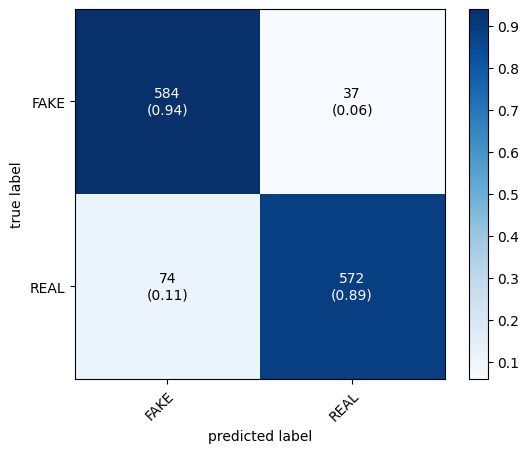

In [24]:
print('Confusion Matrix for LogisticRegression')
plot_confusion_matrix(conf_mat=cm6,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])